Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [4]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   33G   81G  29% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
/dev/sda1        86G   54G   33G  63% /kaggle/input
tmpfs           6.4G   88K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  1.6G   14G  11% /content/gdrive


In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/MyDrive/CNN_assignment.zip" -d '/content/gdrive/MyDrive'

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Te

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [19]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [20]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [21]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split=0.2,
    image_size = (img_height,img_width),
    batch_size = batch_size,
    subset = "training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split=0.2,
    image_size = (img_height,img_width),
    batch_size = batch_size,
    subset = "validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

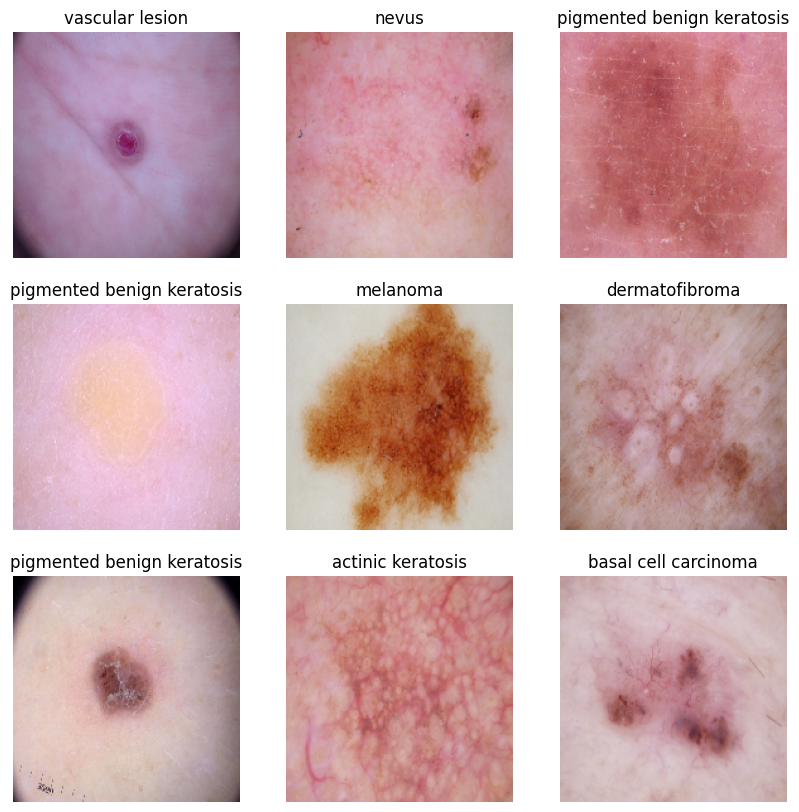

In [12]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

#Since there are 9 classes, lets divide it into 3x3 format
plt.figure(figsize=(10,10))

for img,labels in train_ds.take(1):
  for i in range(len(class_names)):
    plt.subplot(3,3,i+1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [15]:
### Your code goes here
#CNN Model Architecture
#importing the libraries for keras layers
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Rescaling

classes = 9

#sequential model helps us to add all the layers in a sequence one by one
model = Sequential()

#Adding the first layer with re-scaled values of the pixels in the image
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

#Second Convolution Layer
model.add(Conv2D(32, (3,3), activation='relu'))
#Adding another Pooling layer
model.add(MaxPooling2D((2,2)))

#Third Convulation Layer
model.add(Conv2D(64, (3,3), activation='relu'))
#Adding another Pooling layer
model.add(MaxPooling2D((2,2)))

#Fourth convulation layer
model.add(Conv2D(128, (3,3), activation='relu'))

#adding the flatten layer to convert into 1-D array
model.add(layers.Flatten())

#fully connected layer (Dense layer)
model.add(Dense(128, activation="relu"))

# Output neuron
model.add(Dense(classes, activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [16]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 215168)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      27,541,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,636,041 (105.42 MB)

 Trainable params: 27,636,041 (105.42 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [22]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 290ms/step - accuracy: 0.3506 - loss: 1.8071 - val_accuracy: 0.3803 - val_loss: 1.7004
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 266ms/step - accuracy: 0.4195 - loss: 1.6626 - val_accuracy: 0.4989 - val_loss: 1.5317
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.4928 - loss: 1.4521 - val_accuracy: 0.5459 - val_loss: 1.3661
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 262ms/step - accuracy: 0.5398 - loss: 1.3107 - val_accuracy: 0.5436 - val_loss: 1.3817
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 263ms/step - accuracy: 0.5595 - loss: 1.2579 - val_accuracy: 0.5078 - val_loss: 1.4340
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.5639 - loss: 1.2163 - val_accuracy: 0.4832 - val_loss: 1.4977
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.5890 - loss: 1.1449 - val_accuracy: 0.5034 - val_loss: 1.6157
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - accuracy: 0.5913 - loss: 1.1242 - val_accu

### Visualizing training results

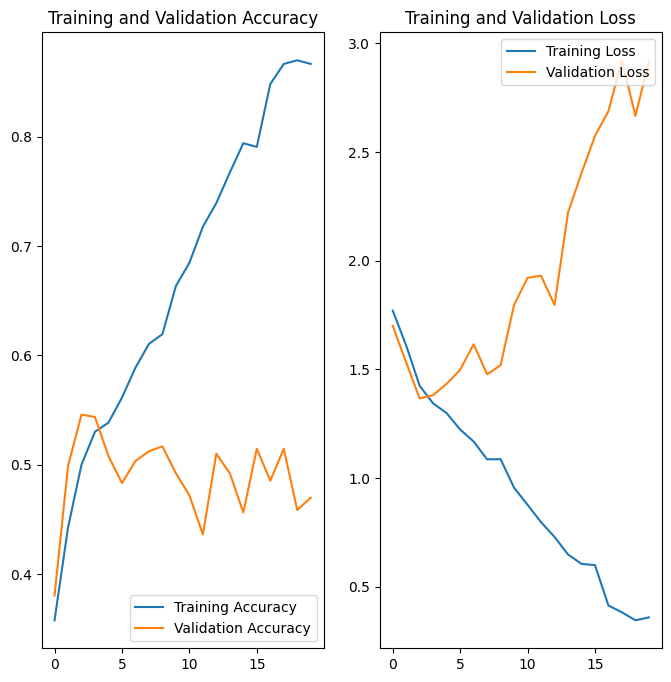

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

We can clearly observe that the **training accuracy is 86%** and **the validation
accuracy is way less, that is 46%, hence the model is overfitting** as it unable to perform better on the test data

In [24]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
  ]
)


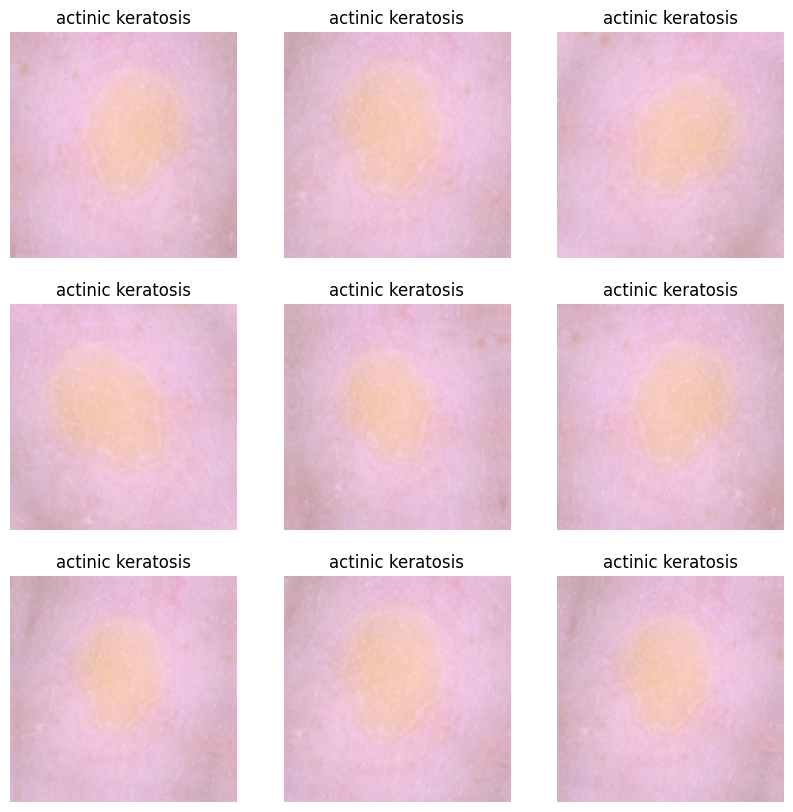

In [25]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(len(class_names)):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[0])

### Todo:
### Create the model, compile and train the model


In [26]:
### Your code goes here
#CNN Model Architecture
#importing the libraries for keras layers
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Rescaling

classes = 9

#initialize sequential model
model = Sequential()

#first convolution layer with the re-scaling
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

#second adding the data augmentation to the images
model.add(data_augmentation)

#Third Convolution Layer
model.add(Conv2D(32, (3,3), activation='relu'))
#Adding another Pooling layer
model.add(MaxPooling2D((2,2)))

#Fourth Convulation Layer
model.add(Conv2D(64, (3,3), activation='relu'))
#Adding another Pooling layer
model.add(MaxPooling2D((2,2)))

#Fifth convulation layer
model.add(Conv2D(128, (3,3), activation='relu'))

#Adding the dropout layer to dropout 25% of the connections in the network
model.add(Dropout(0.2))

model.add(Flatten())

#fully connected layer (Dense layer)
model.add(Dense(128, activation="relu"))

# Output neuron
model.add(Dense(classes, activation='softmax'))


### Compiling the model

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# View the summary of all layers
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 41, 41, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 215168)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      27,541,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,636,041 (105.42 MB)

 Trainable params: 27,636,041 (105.42 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [29]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - accuracy: 0.2148 - loss: 4.1506 - val_accuracy: 0.3199 - val_loss: 1.8617
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 280ms/step - accuracy: 0.3587 - loss: 1.7925 - val_accuracy: 0.4094 - val_loss: 1.6243
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - accuracy: 0.4080 - loss: 1.6562 - val_accuracy: 0.4385 - val_loss: 1.5922
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - accuracy: 0.4612 - loss: 1.5559 - val_accuracy: 0.4743 - val_loss: 1.5130
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 271ms/step - accuracy: 0.4605 - loss: 1.5290 - val_accuracy: 0.4899 - val_loss: 1.4601
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 284ms/step - accuracy: 0.4609 - loss: 1.4946 - val_accuracy: 0.4922 - val_loss: 1.4664
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 269ms/step - accuracy: 0.5058 - loss: 1.4490 - val_accuracy: 0.5145 - val_loss: 1.3655
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - accuracy: 0.5274 - loss: 1.3666 - val_accu

### Visualizing the results

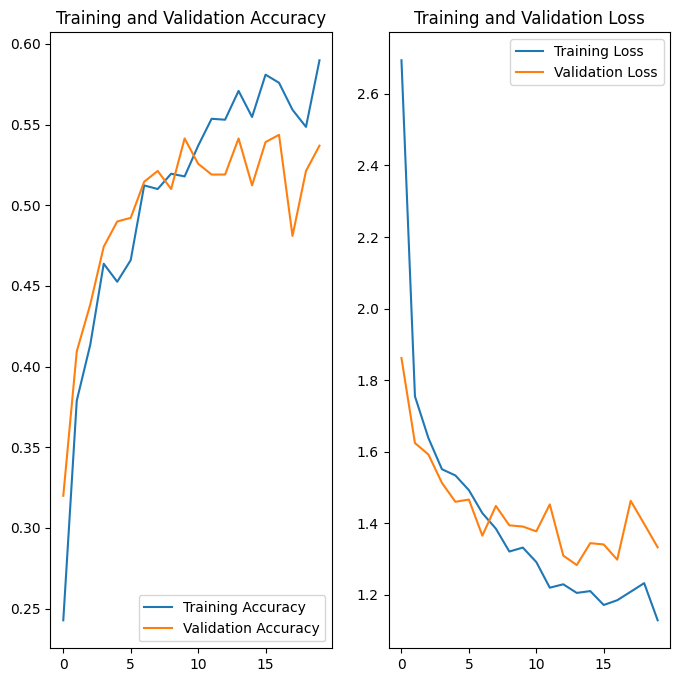

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Compared to the previous model, after applying the data augmentation, we can observe that the **training score is 58% and validation score is around 53%,** hence the model is slightly over-fit but performs better than the previous model,
**but since the accuracy for both training and validation is quite low i.e 50%, the model seems to be underfitting**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

actinic keratosis: 92
basal cell carcinoma: 309
dermatofibroma: 77
melanoma: 352
nevus: 277
pigmented benign keratosis: 370
seborrheic keratosis: 58
squamous cell carcinoma: 142
vascular lesion: 115


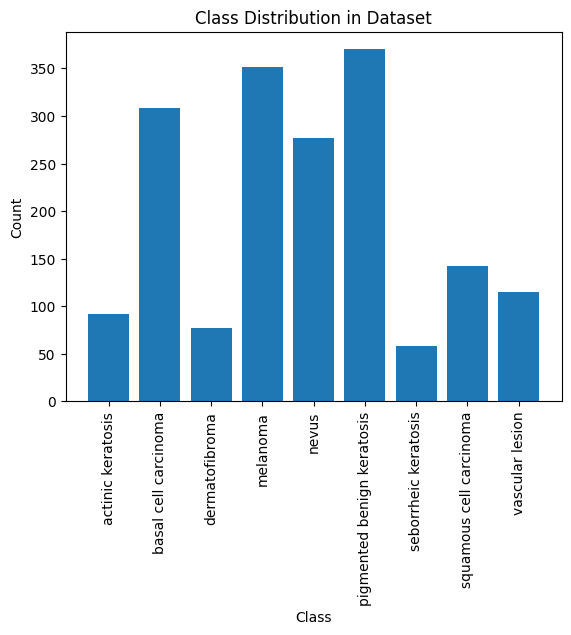

In [31]:
from collections import Counter

class_counts=Counter()

for images, labels in train_ds:
  class_counts.update(labels.numpy())

for i, class_name in enumerate(class_names):
    print(f'{class_name}: {class_counts[i]}')


plt.bar(class_names, [class_counts[i] for i in range(len(class_names))])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=90)
plt.show()


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
**Class of least number of samples- 6-seborrheic keratosis**
#### - Which classes dominate the data in terms proportionate number of samples?
**Class of dominant number of samples- 5- pigmented benign keratosis**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [34]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [35]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [36]:
path_to_training_dataset="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B2F9418F8E0>: 100%|██████████| 500/500 [00:21<00:00, 23.53 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B2F941CEF80>: 100%|██████████| 500/500 [00:18<00:00, 27.14 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B2F9421BE50>: 100%|██████████| 500/500 [00:19<00:00, 25.95 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B2F943EE4A0>: 100%|██████████| 500/500 [01:32<00:00,  5.43 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7B2FA079A440>: 100%|██████████| 500/500 [01:18<00:00,  6.38 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B2FA07B4EE0>: 100%|██████████| 500/500 [00:19<00:00, 25.58 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B30182C2740>: 100%|██████████| 500/500 [00:39<00:00, 12.72 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B2F943D90C0>: 100%|██████████| 500/500 [00:19<00:00, 25.16 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B2F9421ADA0>: 100%|██████████| 500/500 [00:18<00:00, 26.51 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [37]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [38]:
import os # imports the os module
from glob import glob # imports the glob function from the glob module

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027580.jpg_4ed7b64a-76c0-4c2c-8b78-fecdfda5ec81.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030242.jpg_5743b710-0e9e-40f4-8c58-80e0065037f0.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026040.jpg_b49eb56f-c97f-48ae-8c37-8b4920b4a4dc.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028941.jpg_7a075678-b3e5-49ca-8aa6-05af482959ea.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026468.jpg_7c36a7e0-fe88

In [39]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [41]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [42]:
#lets create an original df with path and labels, to which we will append the dataframe with the newly added images
path_list_original=[]
label_list_original=[]
for i in class_names:
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list_original.append(str(j))
        label_list_original.append(i)
dataframe_dict_original = dict(zip(path_list_original, label_list_original))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2235,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2236,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2237,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion


In [47]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2])
df2

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
...,...,...
4495,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
4496,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
4497,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
4498,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion


In [48]:
new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,962
melanoma,938
basal cell carcinoma,876
nevus,857
squamous cell carcinoma,681
vascular lesion,639
actinic keratosis,614
dermatofibroma,595
seborrheic keratosis,577


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [49]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [50]:
data_dir_train=pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [52]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [53]:
## Adding auto-tuning
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [54]:
## your code goes here
#CNN Model Architecture
#importing the libraries for keras layers
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Rescaling

classes = 9

#initialize sequential model
model = Sequential()

#first convolution layer with the re-scaling
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

#second adding the data augmentation to the images
model.add(data_augmentation)

#Third Convolution Layer
model.add(Conv2D(32, (3,3), activation='relu'))
#Adding another Pooling layer
model.add(MaxPooling2D((2,2)))

#Fourth Convulation Layer
model.add(Conv2D(64, (3,3), activation='relu'))
#Adding another Pooling layer
model.add(MaxPooling2D((2,2)))

#Fifth convulation layer
model.add(Conv2D(128, (3,3), activation='relu'))

#Adding the dropout layer to dropout 25% of the connections in the network
model.add(Dropout(0.2))

model.add(Flatten())

#fully connected layer (Dense layer)
model.add(Dense(128, activation="relu"))

# Output neuron
model.add(Dense(classes, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [55]:
## your code goes here

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 41, 41, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 215168)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      27,541,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,636,041 (105.42 MB)

 Trainable params: 27,636,041 (105.42 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:**  Train your model

In [57]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 133ms/step - accuracy: 0.1784 - loss: 2.4977 - val_accuracy: 0.3430 - val_loss: 1.7517
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.3857 - loss: 1.6061 - val_accuracy: 0.4291 - val_loss: 1.4292
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.4526 - loss: 1.4400 - val_accuracy: 0.5048 - val_loss: 1.3600
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.4713 - loss: 1.3924 - val_accuracy: 0.4759 - val_loss: 1.3874
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.4845 - loss: 1.3548 - val_accuracy: 0.5174 - val_loss: 1.2712
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.5008 - loss: 1.3116 - val_accuracy: 0.5427 - val_loss: 1.2024
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.5486 - loss: 1.1968 - val_accuracy: 0.5620 - val_loss: 1.1705
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.5530 - loss: 1.1573 -

#### **Todo:**  Visualize the model results

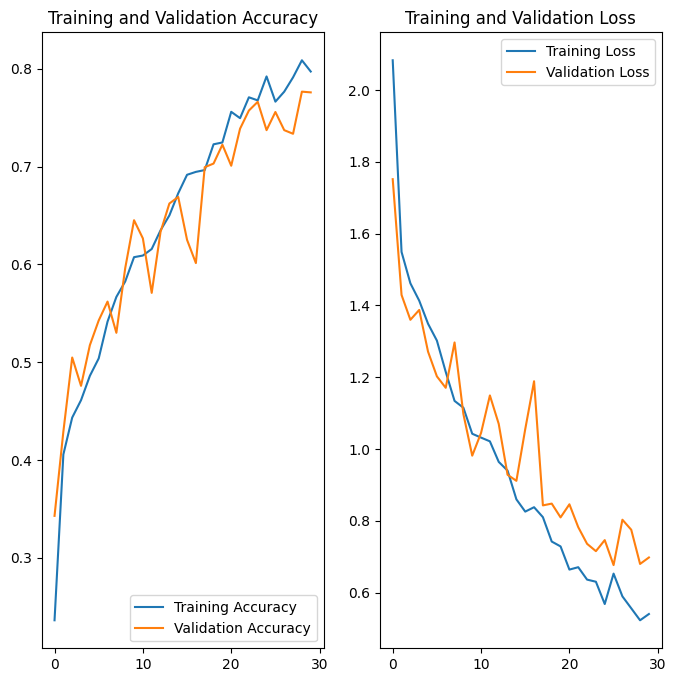

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



From the accuracy, we can observe that the training accuracy is around 80% and the validation accuracy is around 77%, it is much better than the two models we trained earlier on.

Thus, with augmentation of new images, we could achieve better results and accuracies.

**MODEL PREDICTION**

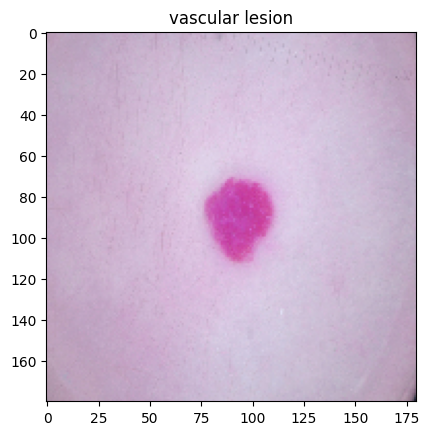

In [59]:
from tensorflow.keras.preprocessing.image import load_img

Test_image_path = os.path.join(data_dir_test, class_names[-1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.title(class_names[-1])
plt.grid(False)

In [60]:
img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[-1] +'\n'+ "Predictive Class "+pred_class )

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
Actual Class vascular lesion
Predictive Class vascular lesion
